In [17]:
#Autoria: Steven Alejandro Marin Salazar
#Identificación: 1036958951
#Curso: Analisis de datos
#Grupo: 23

#Cargue de librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist



In [9]:
#Cargue del dataset
data = pd.read_csv("D:/Bibliotecas/Documentos/UNAD/16 04 2024/Analisis de Datos/Momento Intermedio/Tarea 4/Anexo 5 Dataset Mall Customer/Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
#Lectura de los 50 primeros registros
data.head(50)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [12]:
#descripción de datos estadisticos
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
#Información del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Text(0.5, 1.0, 'Distribución de Edad')

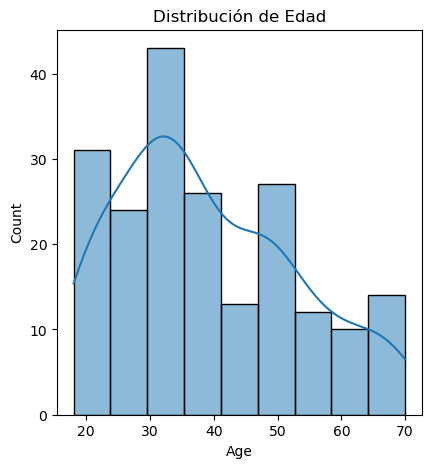

In [19]:
# Distribución de variables clave por edad
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
sns.histplot(data['Age'], kde=True)
plt.title('Distribución de Edad')

Text(0.5, 1.0, 'Distribución de Ingresos Anuales')

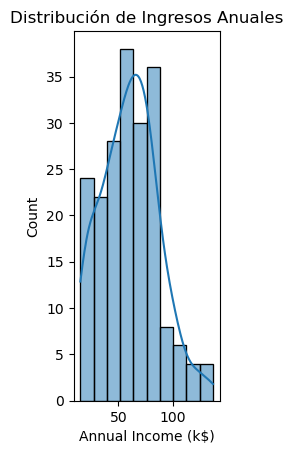

In [21]:
# Distribución de variables clave por ingresos anuales
plt.subplot(1, 3, 2)
sns.histplot(data['Annual Income (k$)'], kde=True)
plt.title('Distribución de Ingresos Anuales')

Text(0.5, 1.0, 'Distribución de Puntuación de Gasto')

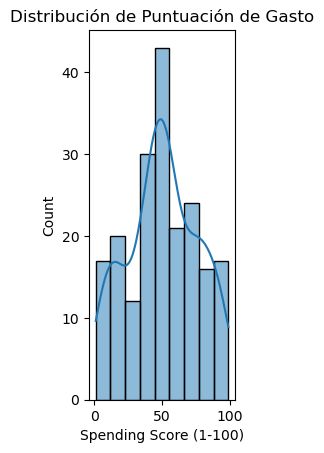

In [22]:
# Distribución de variables clave por punutación de gasto
plt.subplot(1, 3, 3)
sns.histplot(data['Spending Score (1-100)'], kde=True)
plt.title('Distribución de Puntuación de Gasto')


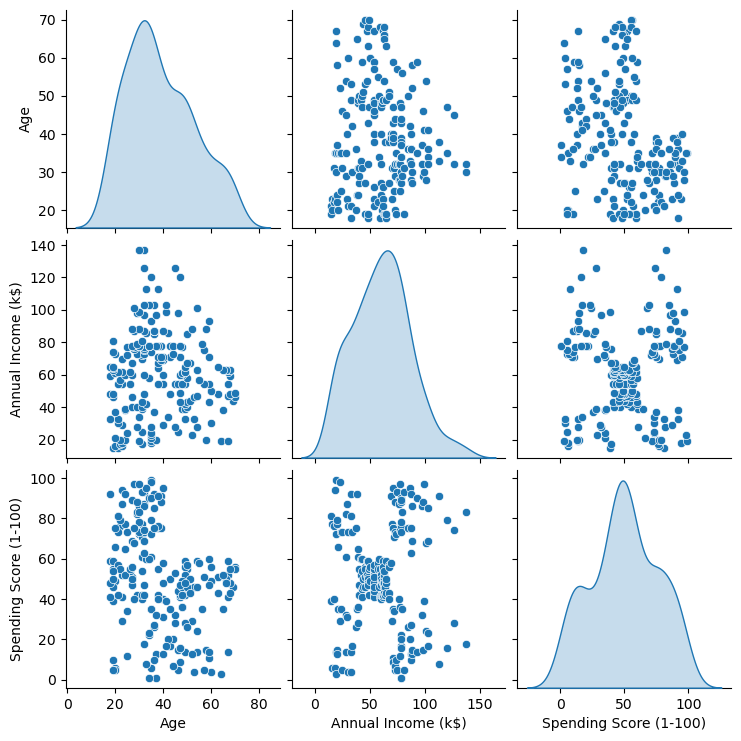

In [23]:
# Relaciones entre variables
sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], diag_kind='kde')
plt.show()

In [28]:
# 2. Preprocesamiento de Datos
# Codificación de la columna 'Gender'
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)


KeyError: "None of [Index(['Gender'], dtype='object')] are in the [columns]"

In [29]:
# Normalización de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [30]:
# 3. Selección de Características
# Seleccionamos las columnas 'Age', 'Annual Income (k$)', y 'Spending Score (1-100)'
X = scaled_data

In [31]:
# 4. Entrenamiento del Modelo y Configuración de Hiperparámetros

## K-means Clustering
# Determinación del número óptimo de clusters con el método del codo
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)


C:\Users\Admin-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory le

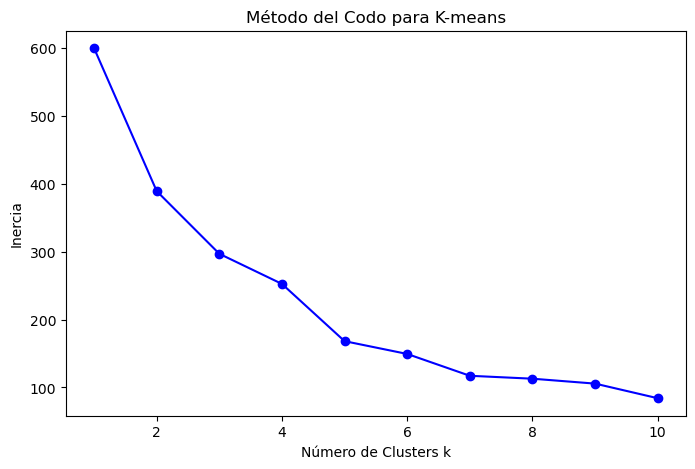

In [32]:
# Gráfico del método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Número de Clusters k')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-means')
plt.show()

In [33]:
# Entrenamiento del modelo K-means con el número óptimo de clusters (e.g., k=5)
k_optimo = 5
kmeans = KMeans(n_clusters=k_optimo, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

C:\Users\Admin-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


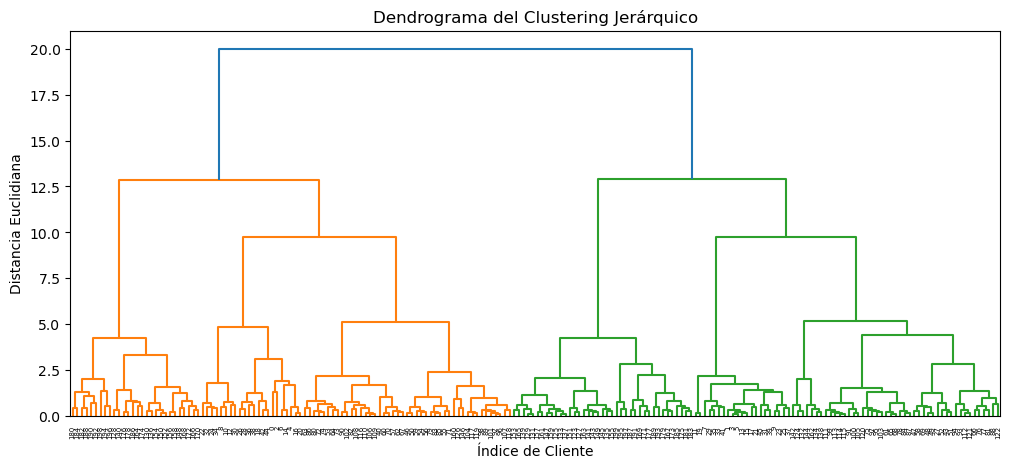

In [34]:
# Hierarchical Clustering
# Generación de dendrograma para encontrar el número óptimo de clusters
Z = linkage(X, method='ward')
plt.figure(figsize=(12, 5))
dendrogram(Z)
plt.title('Dendrograma del Clustering Jerárquico')
plt.xlabel('Índice de Cliente')
plt.ylabel('Distancia Euclidiana')
plt.show()

In [35]:
# Entrenamiento del modelo de Clustering Jerárquico con el número óptimo de clusters
hierarchical = AgglomerativeClustering(n_clusters=k_optimo)
hierarchical_labels = hierarchical.fit_predict(X)

In [36]:
# 5. Evaluación del Desempeño del Modelo

# Coeficiente de Silhouette
silhouette_kmeans = silhouette_score(X, kmeans_labels)
silhouette_hierarchical = silhouette_score(X, hierarchical_labels)

# Índice de Calinski-Harabasz
calinski_kmeans = calinski_harabasz_score(X, kmeans_labels)
calinski_hierarchical = calinski_harabasz_score(X, hierarchical_labels)

print(f"Coeficiente de Silhouette (K-means): {silhouette_kmeans}")
print(f"Coeficiente de Silhouette (Clustering Jerárquico): {silhouette_hierarchical}")
print(f"Índice de Calinski-Harabasz (K-means): {calinski_kmeans}")
print(f"Índice de Calinski-Harabasz (Clustering Jerárquico): {calinski_hierarchical}")


Coeficiente de Silhouette (K-means): 0.41664341513732767
Coeficiente de Silhouette (Clustering Jerárquico): 0.39002826186267214
Índice de Calinski-Harabasz (K-means): 125.10094020060956
Índice de Calinski-Harabasz (Clustering Jerárquico): 107.82656032570374


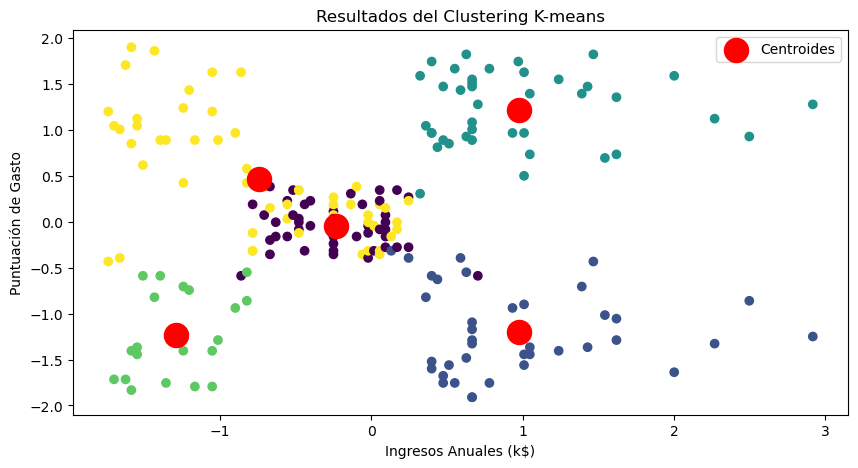

In [37]:
# 6. Visualización de Resultados

# Visualización de K-means clustering
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 1], X[:, 2], c=kmeans_labels, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red', label='Centroides')
plt.xlabel('Ingresos Anuales (k$)')
plt.ylabel('Puntuación de Gasto')
plt.title('Resultados del Clustering K-means')
plt.legend()
plt.show()

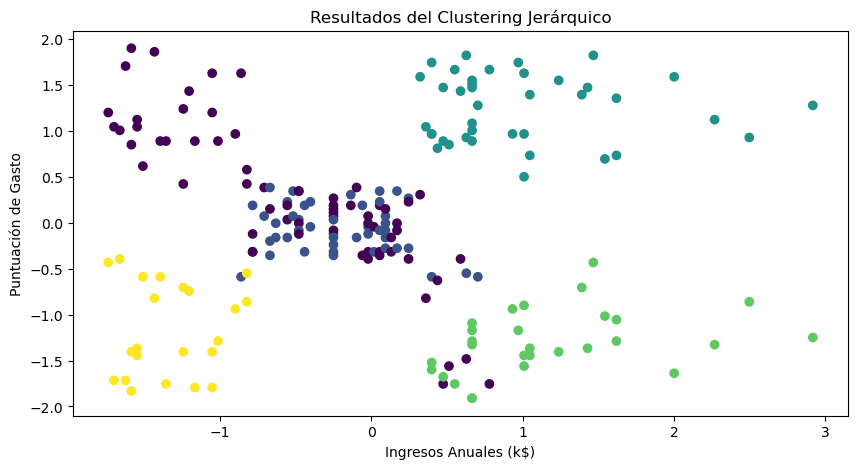

In [38]:
# Visualización del Clustering Jerárquico
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 1], X[:, 2], c=hierarchical_labels, cmap='viridis')
plt.xlabel('Ingresos Anuales (k$)')
plt.ylabel('Puntuación de Gasto')
plt.title('Resultados del Clustering Jerárquico')
plt.show()